In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- prediction of the economic loss of each county by the top 3 industry
- affect directly & non-directly affect
- N/A
- 

In [2]:
# Load the data.
df = pd.read_csv('../data/q2_q3_q4.csv')

In [3]:
# Check the df dataframe.
df.head()

,Unnamed: 0,Area Name,Average Weekly Wages,Employment,FIPS,Industry,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent),Quarter
0,0,Anderson County,275.0,1666.0,48001.0,Leisure and Hospitality,109.0,1.1,3.1,Second Quarter
1,1,Andrews County,439.0,531.0,48003.0,Leisure and Hospitality,37.0,-0.9,17.5,Second Quarter
2,2,Angelina County,302.0,3549.0,48005.0,Leisure and Hospitality,157.0,-0.3,7.6,Second Quarter
3,3,Aransas County,335.0,1660.0,48007.0,Leisure and Hospitality,124.0,-0.9,6.8,Second Quarter
4,4,Archer County,222.0,60.0,48009.0,Leisure and Hospitality,8.0,-21.3,50.0,Second Quarter


In [4]:
# check the shape of data frame.
df.shape

(8154, 10)

In [5]:
# check the std & mean & min & max of the data.
df.describe()

,Unnamed: 0,Average Weekly Wages,Employment,FIPS,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent)
count,8154.000000,7186.000000,7186.000000,8126.000000,8126.000000,6834.000000,6827.000000
mean,1358.515575,794.169775,4151.521709,48253.364509,233.172656,5.774422,11.140179
std,784.694015,378.104028,22583.140257,146.771133,1174.494175,40.117113,72.803183
min,0.000000,0.000000,0.000000,48001.000000,1.000000,-100.000000,-100.000000
25%,679.000000,551.000000,76.250000,48127.000000,9.000000,-2.500000,-4.200000
50%,1358.500000,759.000000,312.500000,48251.000000,29.000000,2.800000,1.700000
75%,2038.000000,979.000000,1202.750000,48381.000000,87.750000,9.000000,9.400000
max,2724.000000,4316.000000,485145.000000,48507.000000,25099.000000,2421.400000,2200.000000


In [6]:
# Check the column's name.
df.columns

Index(['Unnamed: 0', 'Area Name', 'Average Weekly Wages', 'Employment', 'FIPS',
       'Industry', 'No Of Establishments',
       'On-Year Weekly Wages Gain/Loss (Percent)',
       'One-Year Employment Gain/Loss (Percent)', 'Quarter'],
      dtype='object')

In [7]:
# Create a list with all the direct affect county.
direct_affect = ['Aransas County', 'Austin County', 'Bastrop County',
                 'Bee County', 'Brazoria County', 'Caldwell County',
                 'Calhoun County', 'Chambers County', 'Colorado County',
                 'DeWitt County', 'Fayette County', 'Fort Bend County',
                 'Galveston County', 'Goliad County', 'Gonzales County', 
                 'Grimes County', 'Hardin County', 'Harris County',
                 'Jackson County', 'Jasper County', 'Jefferson County',
                 'Karnes County', 'Kleberg County', 'Lavaca County',
                 'Lee County', 'Liberty County', 'Matagorda County',
                 'Montgomery County', 'Newton County', 'Nueces County',
                 'Orange County', 'Polk County', 'Refugio County',
                 'Sabine County', 'San Jacinto County', 'San Patricio County',
                 'Tyler County', 'Victoria County', 'Walker County',
                 'Waller County', 'Wharton County']

- For identify which county is affect, I will create a new column to indicate that. 

In [8]:
# Code to get other counties.
list_of_counties = list(df['Area Name'].unique())

not_affect = [i for i in list_of_counties if i not in direct_affect]

In [9]:
# Create a dic for direct affect county.
dict1 = {}
for i in direct_affect:
    dict1[i] = 1

In [10]:
# Add new key & value of the dict1. 
for i in not_affect:
    dict1[i] = 0

In [11]:
# Create a column to indicate is the county impacted or not.
df['Was it impacted?'] = df['Area Name'].map(dict1)

In [12]:
df['Was it impacted?'].value_counts()

0    6809
1    1345
Name: Was it impacted?, dtype: int64

In [13]:
# Check the null value of the data.
df.isnull().sum()

Unnamed: 0                                     0
Area Name                                      0
Average Weekly Wages                         968
Employment                                   968
FIPS                                          28
Industry                                      28
No Of Establishments                          28
On-Year Weekly Wages Gain/Loss (Percent)    1320
One-Year Employment Gain/Loss (Percent)     1327
Quarter                                       28
Was it impacted?                               0
dtype: int64

In [14]:
df.shape

(8154, 11)

In [15]:
# I want to know why there are rows don't Quarter.
# After check, these rows without Quarter are just empty row.
# Remove these rows
df = df[df.Quarter.notna()]

In [16]:
df.Quarter.isna().sum()

0

In [17]:
# Check the null vlaue of Employment column 
# It is wired to have number of establishments but not employment
df[df.Employment.isnull()]

,Unnamed: 0,Area Name,Average Weekly Wages,Employment,FIPS,Industry,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent),Quarter,Was it impacted?
85,85,Glasscock County,NaN,NaN,48173.0,Leisure and Hospitality,1.0,NaN,NaN,Second Quarter,0
130,130,Kent County,NaN,NaN,48263.0,Leisure and Hospitality,2.0,NaN,NaN,Second Quarter,0
148,148,Loving County,NaN,NaN,48301.0,Leisure and Hospitality,2.0,NaN,NaN,Second Quarter,0
194,194,Roberts County,NaN,NaN,48393.0,Leisure and Hospitality,1.0,NaN,NaN,Second Quarter,0
204,204,Schleicher County,NaN,NaN,48413.0,Leisure and Hospitality,2.0,NaN,NaN,Second Quarter,0
213,213,Sterling County,NaN,NaN,48431.0,Leisure and Hospitality,3.0,NaN,NaN,Second Quarter,0
221,221,Throckmorton County,NaN,NaN,48447.0,Leisure and Hospitality,2.0,NaN,NaN,Second Quarter,0
269,269,Borden County,NaN,NaN,48033.0,Education and Health Services,7.0,NaN,NaN,Second Quarter,0
305,305,Crockett County,NaN,NaN,48105.0,Education and Health Services,6.0,NaN,NaN,Second Quarter,0
307,307,Culberson County,NaN,NaN,48109.0,Education and Health Services,2.0,NaN,NaN,Second Quarter,0


In [18]:
# Compare the quarter with employment and see the trend
Base_line_county_quarter = df.groupby(['Industry','Area Name']).sum()
Base_line_county_quarter

Unnamed: 0  Average Weekly Wages  Employment  \
Industry     Area Name                                                         
Construction Anderson County          1976                2670.0      1845.0   
             Andrews County           1979                4482.0      2477.0   
             Angelina County          1982                2405.0      4232.0   
             Aransas County           1985                2817.0      1060.0   
             Archer County            1988                2061.0       376.0   
             Armstrong County         1991                2846.0       164.0   
             Atascosa County          1994                2544.0      1369.0   
             Austin County            1997                3244.0      2711.0   
             Bailey County            2000                2380.0       124.0   
             Bandera County           2003                2366.0       916.0   
             Bastrop County           2006                2966.0      3444.0   
             Baylor County            2009                   0.0         0.0   
             Bee County               2012                2291.0       379.0   
             Bell County              2015                3350.0     15308.0   
             Bexar County             2018                3364.0    116536.0   
             Blanco County            2021                3796.0      1741.0   
             Borden County            2024                   0.0         0.0   
             Bosque County            2027                2943.0       695.0   
             Bowie County             2030                2577.0      4895.0   
             Brazoria County          2033                4681.0     42607.0   
             Brazos County            2036                2737.0     14985.0   
             Brewster County          2039                2477.0       516.0   
             Briscoe County           2042                   0.0         0.0   
             Brooks County            2045                2363.0       201.0   
             Brown County             2048                2581.0      1751.0   
             Burleson County          2051                3790.0      1512.0   
             Burnet County            2054                2802.0      3817.0   
             Caldwell County          2057                2755.0      1659.0   
             Calhoun County           2060                3421.0      6927.0   
             Callahan County          2063                3889.0       530.0   
...                                    ...                   ...         ...   
Unclassified Taylor County            7558                2140.0       199.0   
             Terry County             7561                1431.0        48.0   
             Titus County             7564                1266.0        49.0   
             Tom Green County         7567                1088.0       104.0   
             Travis County            7570                2810.0      1948.0   
             Trinity County           7573                 445.0         5.0   
             Tyler County             7576                 518.0        30.0   
             Upshur County            7579                 689.0        12.0   
             Upton County             7582                 444.0         0.0   
             Uvalde County            7585                1041.0        28.0   
             Val Verde County         7588                1103.0        50.0   
             Van Zandt County         7591                1836.0        77.0   
             Victoria County          7594                2580.0        89.0   
             Walker County            7597                2291.0        83.0   
             Waller County            7600                2501.0        74.0   
             Ward County              2710                1938.0         2.0   
             Washington County        7604                2430.0        86.0   
             Webb County        

In [32]:
df['Economic Value'] = df['Employment'] * df['Average Weekly Wages']

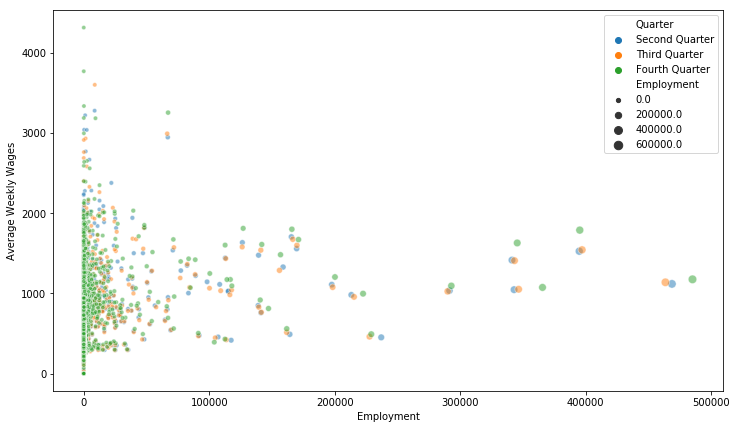

In [33]:
# scatter plot for each industry v.s. quarter 
plt.figure(figsize = (12,7))
sns.scatterplot('Employment', 'Average Weekly Wages', data = df,
                hue = 'Quarter', size = 'Employment', alpha = 0.5)

In [34]:
table = pd.pivot_table(df, values='Employment', index=['Area Name','Industry'], columns=['Quarter'], aggfunc=np.sum)

In [35]:
# table

# Split and Save the dataframe by Industry 

In [36]:
df.Industry.unique()

array(['Leisure and Hospitality', 'Education and Health Services',
       'Professional and Business Services', 'Financial Activities',
       'Information', 'Trade,Transportation, and Utilities',
       'Manufacturing', 'Construction', 'Natural Resources and Mining',
       'Unclassified', 'Other Services'], dtype=object)

In [110]:
# create new dataframes by Industry
mask_cons = df.Industry == 'Construction'
df_cons = df[mask_cons]

# save as df_cons
df_cons.to_csv('../BLS_Data_Q4_17/df_cons.csv')

In [124]:
df_cons.head()

,Unnamed: 0,Area Name,Average Weekly Wages,Employment,FIPS,Industry,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent),Quarter,Was it impacted?,Economic Value
1734,1734,Anderson County,869.0,614.0,48001.0,Construction,108.0,26.1,-11.8,Second Quarter,0,533566.0
1735,1735,Andrews County,1429.0,794.0,48003.0,Construction,37.0,11.0,16.1,Second Quarter,0,1134626.0
1736,1736,Angelina County,763.0,1443.0,48005.0,Construction,143.0,-4.5,2.9,Second Quarter,0,1101009.0
1737,1737,Aransas County,936.0,364.0,48007.0,Construction,62.0,1.5,7.1,Second Quarter,1,340704.0
1738,1738,Archer County,676.0,132.0,48009.0,Construction,40.0,12.7,7.3,Second Quarter,0,89232.0


In [111]:
#df_cons.Quarter = df_cons.Quarter.replace({'Second Quarter':2,
#                         'Third Quarter':3,
#                        'Fourth Quarter':4})

In [152]:
table_cons=pd.pivot_table(df_cons, values='Economic Value', index=['Area Name'], columns=['Quarter'], aggfunc=np.sum)
table_cons.head()


Quarter,Fourth Quarter,Second Quarter,Third Quarter
Area Name,,,
Anderson County,569973.0,533566.0,537888.0
Andrews County,1293075.0,1134626.0,1274036.0
Angelina County,1171864.0,1101009.0,1116120.0
Aransas County,361251.0,340704.0,294954.0
Archer County,79730.0,89232.0,89375.0


In [153]:
# Add columns in table_cons to show the economic change during diff quarter.
table_cons['EV Change(Second to Third)'] = table_cons['Third Quarter'] - table_cons['Second Quarter']
table_cons['EV Change(Third to Fourth)'] = table_cons['Fourth Quarter'] - table_cons['Third Quarter']


In [154]:
# Create a column to indicate is the county impacted or not.
table_cons['Was it impacted?'] = table_cons.index.map(dict1)

In [164]:
top_10_loss = table_cons['EV Change(Second to Third)'].sort_values().head(10).index


In [172]:
table_cons_t = table_cons.T

In [181]:
table_cons_t[['Anderson County']]

Area Name,Anderson County
Quarter,
Fourth Quarter,569973.0
Second Quarter,533566.0
Third Quarter,537888.0
EV Change(Second to Third),4322.0
EV Change(Third to Fourth),32085.0
Was it impacted?,0.0


In [192]:
for i in table_cons_t:
    for name in top_10_loss:
        if i == name:
            df_top_10_loss[i] = table_cons_t[[i]]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [198]:
df_top_10_loss = df_top_10_loss.T

In [201]:
df_top_10_loss.head()

Quarter,Fourth Quarter,Second Quarter,Third Quarter,EV Change(Second to Third),EV Change(Third to Fourth),Was it impacted?
Area Name,,,,,,
Victoria County,1940852.0,2640810.0,1830448.0,-810362.0,110404.0,1.0
Bexar County,46960100.0,42274905.0,41438061.0,-836844.0,5522039.0,0.0
Fort Bend County,22461516.0,20265760.0,18190125.0,-2075635.0,4271391.0,1.0
Galveston County,8114589.0,8169525.0,6772700.0,-1396825.0,1341889.0,1.0
Gregg County,8065624.0,7883382.0,7152912.0,-730470.0,912712.0,0.0


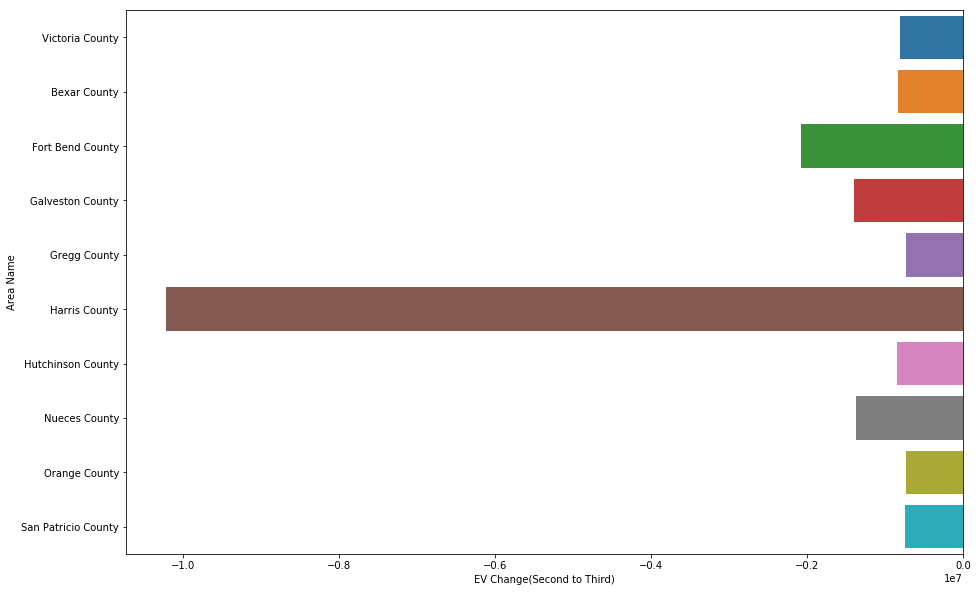

In [206]:
# Scatter plot of Economoic value change of diff quarter
plt.figure(figsize = (15,10))

sns.barplot(x= 'EV Change(Second to Third)',
            y = df_top_10_loss.index,
            data = df_top_10_loss);

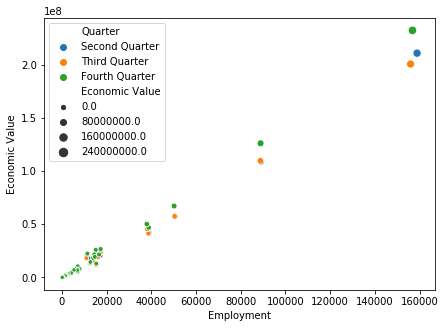

In [161]:
# Scatter plot of Construction 
plt.figure(figsize = (7,5))

sns.scatterplot('Employment','Economic Value',
           data = df_cons, hue ='Quarter', size ='Economic Value',
               size_order = (10,200))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


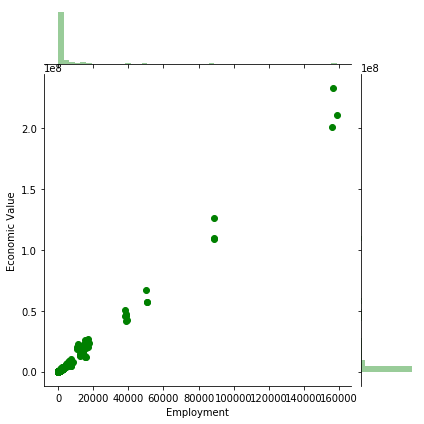

In [98]:
sns.jointplot('Employment','Economic Value',
           data = df_cons, color = 'green')

In [59]:
mask_Leisure_Hospitality = df.Industry == 'Leisure and Hospitality'
df_Leisure_Hospitality = df[mask_Leisure_Hospitality]

In [ ]:
# Create a column of the total wage of county
df['Weekly Economic Value'] = df['Employment'] * df['Average Weekly Wages']

In [ ]:
# save as df_hosp
df_Leisure_Hospitality.to_csv('../BLS_Data_Q4_17/df_hosp.csv')

In [ ]:
# Leisure and Hospitality

In [ ]:
mask_edu = df.Industry == 'Education and Health Services'
df_edu = df[mask_edu]

In [ ]:
# save as df_edu
df_edu.to_csv('../BLS_Data_Q4_17/df_edu.csv')

In [ ]:
mask_prof = df.Industry == 'Professional and Business Services'
df_prof = df[mask_prof]

In [ ]:
# save as df_edu
df_prof.to_csv('../BLS_Data_Q4_17/df_prof.csv')

In [ ]:
mask_fin = df.Industry == 'Financial Activities'
df_fin = df[mask_fin]

In [ ]:
# save as df_edu
df_fin.to_csv('../BLS_Data_Q4_17/df_fin.csv')

In [ ]:
mask_info = df.Industry == 'Information'
df_info = df[mask_prof]

In [ ]:
# save as df_edu
df_info.to_csv('../BLS_Data_Q4_17/df_info.csv')

In [ ]:
mask_trad = df.Industry == 'Trade,Transportation, and Utilities'
df_trad = df[mask_trad]

In [ ]:
# save as df_edu
df_trad.to_csv('../BLS_Data_Q4_17/df_trad.csv')

In [ ]:
mask_man = df.Industry == 'Manufacturing'
df_man = df[mask_man]

In [ ]:
# save as df_edu
df_man.to_csv('../BLS_Data_Q4_17/df_man.csv')

In [ ]:
mask_nat = df.Industry == 'Natural Resources and Mining'
df_nat = df[mask_nat]

In [ ]:
# save as df_edu
df_nat.to_csv('../BLS_Data_Q4_17/df_nat.csv')

In [ ]:
mask_un = df.Industry == 'Unclassified'
df_un = df[mask_un]

In [ ]:
# save as df_edu
df_un.to_csv('../BLS_Data_Q4_17/df_un.csv')

In [ ]:
mask_os = df.Industry == 'Other Services'
df_os = df[mask_un]

In [ ]:
# save as df_edu
df_os.to_csv('../BLS_Data_Q4_17/df_os.csv')